<a href="https://colab.research.google.com/github/ANGEL05122002/Modelos-y-Simulacion/blob/main/PROYECTO_MODELOS_Y_SIMULACION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## La mortalidad, la fecundidad y la migración son fundamentales para comprender la dinámica del crecimiento de la población. La información que generan las EDR incluye la causa básica de las defunciones en México, así como las características del hecho y de las personas fallecidas. Lo anterior brinda elementos para analizar, diseñar, evaluar y dar seguimiento a las políticas de salud de la población.

## Las Estadísticas de Defunciones Registradas (EDR) permiten conocer y comparar el volumen, tendencias y características de la mortalidad en los diferentes ámbitos geográficos del país.

* El INEGI presenta información
proveniente del aprovechamiento de los registros administrativos generados por el Registro Civil, el Servicio
Médico Forense (SEMEFO) o sus equivalentes, así como por las Agencias del Ministerio Público o sus equivalentes en las entidades federativas.

* Integra también información generada por la Secretaría de Salud, que resulta del proceso de confronta entre la Secretaría de Salud y el INEGI, previo a la publicación de la información
definitiva.

La base de datos de este hecho vital tiene como objetivo ofrecer microdatos útiles y accesibles a estudiantes,
investigadores, autoridades y público en general, para atender las necesidades de información demográfica proveniente de los registros administrativos.

Para la realización de este trabajo se necesito la obtención de la base de datos, su importación y manejo a tráves de un entorno de ejecución.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Cargar el dataset
mortalidad = pd.read_csv('mortalidad.CSV')
# Mostrar las primeras filas del dataset
print(mortalidad.head().to_markdown(index=False, numalign="left", stralign="left"))

# Mostrar información sobre las columnas del dataset
print(mortalidad.info())

| ent_regis   | mun_regis   | tloc_regis   | loc_regis   | ent_resid   | mun_resid   | tloc_resid   | loc_resid   | ent_ocurr   | mun_ocurr   | tloc_ocurr   | loc_ocurr   | causa_def   | cod_adicio   | lista_mex   | sexo   | ent_nac   | afromex   | conindig   | lengua   | cve_lengua   | nacionalid   | nacesp_cve   | edad   | sem_gest   | gramos   | dia_ocurr   | mes_ocurr   | anio_ocur   | dia_regis   | mes_regis   | anio_regis   | dia_nacim   | mes_nacim   | anio_nacim   | cond_act   | ocupacion   | escolarida   | edo_civil   | tipo_defun   | ocurr_trab   | lugar_ocur   | par_agre   | vio_fami   | asist_medi   | cirugia   | natviole   | necropsia   | usonecrops   | encefalica   | donador   | sitio_ocur   | cond_cert   | derechohab   | embarazo   | rel_emba   | horas   | minutos   | capitulo   | grupo   | lista1   | gr_lismex   | area_ur   | edad_agru   | complicaro   | dia_cert   | mes_cert   | anio_cert   | maternas   | ent_ocules   | mun_ocules   | loc_ocules   | razon_m   | dis_re_

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Cargar el dataset
mortalidad = pd.read_csv('mortalidad.CSV', on_bad_lines='skip', encoding='latin1')
# Mostrar las primeras filas del dataset
print(mortalidad.head().to_markdown(index=False, numalign="left", stralign="left"))

# Mostrar información sobre las columnas del dataset
print(mortalidad.info())

/tmp/ipython-input-2403057264.py:8: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  mortalidad = pd.read_csv('mortalidad.CSV', on_bad_lines='skip', encoding='latin1')


| ent_regis   | mun_regis   | tloc_regis   | loc_regis   | ent_resid   | mun_resid   | tloc_resid   | loc_resid   | ent_ocurr   | mun_ocurr   | tloc_ocurr   | loc_ocurr   | causa_def   | cod_adicio   | lista_mex   | sexo   | ent_nac   | afromex   | conindig   | lengua   | cve_lengua   | nacionalid   | nacesp_cve   | edad   | sem_gest   | gramos   | dia_ocurr   | mes_ocurr   | anio_ocur   | dia_regis   | mes_regis   | anio_regis   | dia_nacim   | mes_nacim   | anio_nacim   | cond_act   | ocupacion   | escolarida   | edo_civil   | tipo_defun   | ocurr_trab   | lugar_ocur   | par_agre   | vio_fami   | asist_medi   | cirugia   | natviole   | necropsia   | usonecrops   | encefalica   | donador   | sitio_ocur   | cond_cert   | derechohab   | embarazo   | rel_emba   | horas   | minutos   | capitulo   | grupo   | lista1   | gr_lismex   | area_ur   | edad_agru   | complicaro   | dia_cert   | mes_cert   | anio_cert   | maternas   | ent_ocules   | mun_ocules   | loc_ocules   | razon_m   | dis_re_

In [4]:
#Eliminamos cod_adicio y maternas ya que presentan una gran cantidad de NA que interfieren con el Análisis
mortalidad = mortalidad.drop(['cod_adicio', 'maternas'], axis=1)
print(mortalidad.head().to_markdown(index=False, numalign="left", stralign="left"))

| ent_regis   | mun_regis   | tloc_regis   | loc_regis   | ent_resid   | mun_resid   | tloc_resid   | loc_resid   | ent_ocurr   | mun_ocurr   | tloc_ocurr   | loc_ocurr   | causa_def   | lista_mex   | sexo   | ent_nac   | afromex   | conindig   | lengua   | cve_lengua   | nacionalid   | nacesp_cve   | edad   | sem_gest   | gramos   | dia_ocurr   | mes_ocurr   | anio_ocur   | dia_regis   | mes_regis   | anio_regis   | dia_nacim   | mes_nacim   | anio_nacim   | cond_act   | ocupacion   | escolarida   | edo_civil   | tipo_defun   | ocurr_trab   | lugar_ocur   | par_agre   | vio_fami   | asist_medi   | cirugia   | natviole   | necropsia   | usonecrops   | encefalica   | donador   | sitio_ocur   | cond_cert   | derechohab   | embarazo   | rel_emba   | horas   | minutos   | capitulo   | grupo   | lista1   | gr_lismex   | area_ur   | edad_agru   | complicaro   | dia_cert   | mes_cert   | anio_cert   | ent_ocules   | mun_ocules   | loc_ocules   | razon_m   | dis_re_oax   |
|:------------|:----

In [5]:
mortalidad.head(15)

,ent_regis,mun_regis,tloc_regis,loc_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,...,edad_agru,complicaro,dia_cert,mes_cert,anio_cert,ent_ocules,mun_ocules,loc_ocules,razon_m,dis_re_oax
0,1,1,15,1,32,44,5,1,1,1,...,19.0,9.0,18.0,12.0,2022.0,88.0,888.0,8888.0,0.0,999.0
1,1,1,15,1,1,1,15,1,1,1,...,20.0,9.0,12.0,12.0,2022.0,88.0,888.0,8888.0,0.0,999.0
2,1,1,15,1,1,1,15,1,1,1,...,18.0,9.0,17.0,12.0,2022.0,88.0,888.0,8888.0,0.0,999.0
3,1,1,15,1,1,1,15,1,1,1,...,23.0,9.0,1.0,1.0,2023.0,88.0,888.0,8888.0,0.0,999.0
4,1,1,15,1,14,53,1,7777,1,1,...,14.0,8.0,22.0,12.0,2022.0,88.0,888.0,8888.0,0.0,999.0
5,1,1,4,239,1,1,15,1,1,1,...,21.0,9.0,12.0,11.0,2022.0,88.0,888.0,8888.0,0.0,999.0
6,1,1,4,239,1,1,15,1,1,1,...,18.0,9.0,19.0,12.0,2022.0,88.0,888.0,8888.0,0.0,999.0
7,1,1,4,239,1,1,15,1,1,5,...,21.0,9.0,15.0,11.0,2022.0,88.0,888.0,8888.0,0.0,999.0
8,1,1,15,1,1,1,2,127,1,1,...,16.0,8.0,7.0,1.0,2023.0,88.0,888.0,8888.0,0.0,999.0
9,1,1,4,239,1,11,7,1,1,11,...,22.0,8.0,19.0,12.0,2022.0,88.0,888.0,8888.0,0.0,999.0


# Análisis Univariado

Estadísticas descriptivas de 'edad':
count    173471.000000
mean       4025.354301
std         333.064486
min        1001.000000
25%        4051.000000
50%        4067.000000
75%        4080.000000
max        4998.000000
Name: edad, dtype: float64


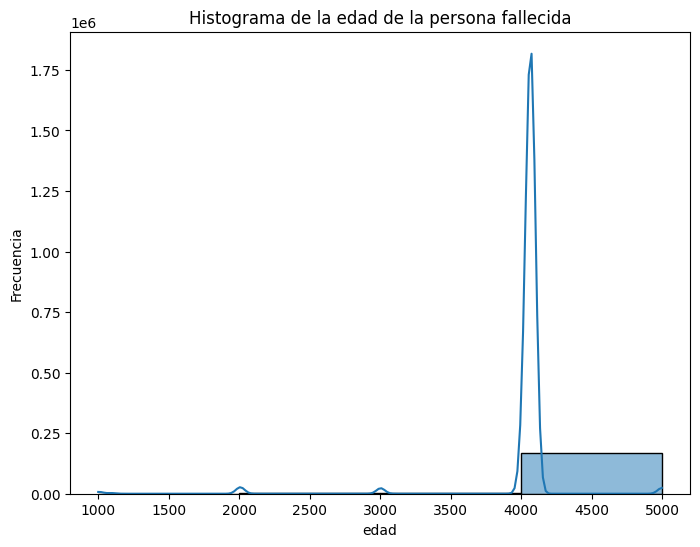

In [6]:
# Análisis univariado de la variable 'edad'
print("Estadísticas descriptivas de 'edad':")
print(mortalidad['edad'].describe())

plt.figure(figsize=(8, 6))
sns.histplot(mortalidad['edad'], bins=4, kde=True)
plt.title('Histograma de la edad de la persona fallecida')
plt.xlabel('edad')
plt.ylabel('Frecuencia')
plt.show()

## La variable "edad" en la base de datos no representa edades numéricas directamente, sino que usa códigos numéricos asociados a diferentes unidades de tiempo (horas, días, meses, años).

## Esto significa que debemos transformar estos valores en una escala coherente por ejemplo, convertir todo a años.

Estadísticas descriptivas de 'edad' (en años):
count    171472.000000
mean         62.843478
std          22.508177
min           0.000114
25%          51.000000
50%          67.000000
75%          80.000000
max         120.000000
Name: edad_transformada, dtype: float64


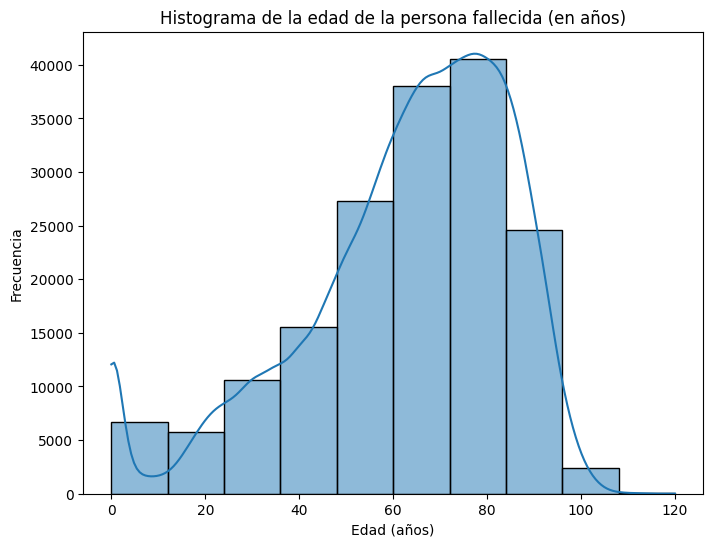

In [7]:
# Función para convertir los valores de edad a años
def convertir_a_anios(valor):
    if 1001 <= valor <= 1023:  # Horas
        return (valor - 1000) / 8760  # Convertir horas a años
    elif 2001 <= valor <= 2029:  # Días
        return (valor - 2000) / 365  # Convertir días a años
    elif 3001 <= valor <= 3011:  # Meses
        return (valor - 3000) / 12  # Convertir meses a años
    elif 4001 <= valor <= 4120:  # Años
        return valor - 4000  # Ya está en años
    else:
        return np.nan  # Si no está en los rangos, se asigna NaN

# Aplicar la conversión a la columna "edad"
mortalidad['edad_transformada'] = mortalidad['edad'].apply(convertir_a_anios)

# Mostrar estadísticas descriptivas después de la transformación
print("Estadísticas descriptivas de 'edad' (en años):")
print(mortalidad['edad_transformada'].describe())

# Histograma
plt.figure(figsize=(8, 6))
sns.histplot(mortalidad['edad_transformada'].dropna(), bins=10, kde=True)
plt.title('Histograma de la edad de la persona fallecida (en años)')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.show()

In [8]:
print(mortalidad.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173471 entries, 0 to 173470
Data columns (total 73 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ent_regis          173471 non-null  int64  
 1   mun_regis          173471 non-null  int64  
 2   tloc_regis         173471 non-null  int64  
 3   loc_regis          173471 non-null  int64  
 4   ent_resid          173471 non-null  int64  
 5   mun_resid          173471 non-null  int64  
 6   tloc_resid         173471 non-null  int64  
 7   loc_resid          173471 non-null  int64  
 8   ent_ocurr          173471 non-null  int64  
 9   mun_ocurr          173471 non-null  int64  
 10  tloc_ocurr         173471 non-null  int64  
 11  loc_ocurr          173471 non-null  int64  
 12  causa_def          173471 non-null  object 
 13  lista_mex          173471 non-null  object 
 14  sexo               173471 non-null  int64  
 15  ent_nac            173471 non-null  int64  
 16  af

In [10]:
# 1. Estadísticas descriptivas de la edad de las personas fallecidas
# Verificar los valores únicos en la columna 'sexo'
print("Valores únicos en la columna 'sexo':", mortalidad['sexo'].unique())

# Convertir la columna 'sexo' a string si es necesario
mortalidad['sexo'] = mortalidad['sexo'].astype(str)

# Filtrar datos por sexo
hombres = mortalidad[mortalidad['sexo'] == '1']
mujeres = mortalidad[mortalidad['sexo'] == '2']

# Calcular estadísticas descriptivas
estadisticas_generales = mortalidad[['edad_transformada']].describe()
estadisticas_hombres = hombres[['edad_transformada']].describe()
estadisticas_mujeres = mujeres[['edad_transformada']].describe()

# Mostrar estadísticas en formato Markdown para mejor visualización
print(" **Estadísticas generales de edad**")
print(estadisticas_generales.to_markdown(numalign="left", stralign="left"))

if not hombres.empty:
    print("\n **Estadísticas de edad para hombres**")
    print(estadisticas_hombres.to_markdown(numalign="left", stralign="left"))

if not mujeres.empty:
    print("\n **Estadísticas de edad para mujeres**")
    print(estadisticas_mujeres.to_markdown(numalign="left", stralign="left"))

Valores únicos en la columna 'sexo': ['2' '1' '9']
 **Estadísticas generales de edad**
|       | edad_transformada   |
|:------|:--------------------|
| count | 171472              |
| mean  | 62.8435             |
| std   | 22.5082             |
| min   | 0.000114155         |
| 25%   | 51                  |
| 50%   | 67                  |
| 75%   | 80                  |
| max   | 120                 |

 **Estadísticas de edad para hombres**
|       | edad_transformada   |
|:------|:--------------------|
| count | 96292               |
| mean  | 59.6717             |
| std   | 22.3648             |
| min   | 0.000114155         |
| 25%   | 46                  |
| 50%   | 63                  |
| 75%   | 77                  |
| max   | 120                 |

 **Estadísticas de edad para mujeres**
|       | edad_transformada   |
|:------|:--------------------|
| count | 75155               |
| mean  | 66.9215             |
| std   | 22.0156             |
| min   | 0.000114155         |
|

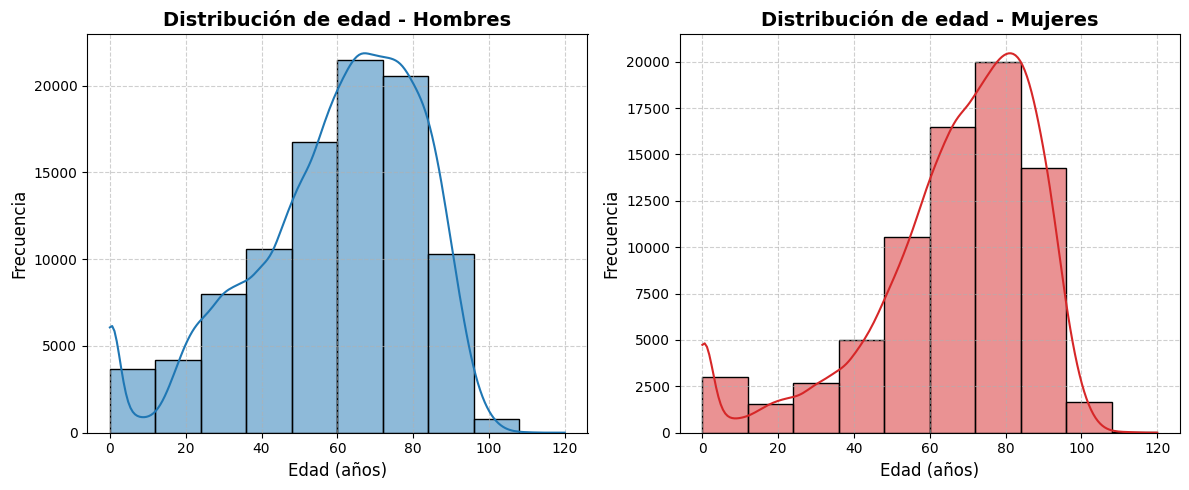

In [11]:
# Definir colores personalizados
color_hombres = "#1f77b4"  # Azul
color_mujeres = "#d62728"  # Rojo


# Crear histogramas con colores personalizados
plt.figure(figsize=(12, 5))

if not hombres.empty:
    plt.subplot(1, 2, 1)
    sns.histplot(hombres['edad_transformada'].dropna(), bins=10, kde=True, color=color_hombres)
    plt.title('Distribución de edad - Hombres', fontsize=14, fontweight='bold')
    plt.xlabel('Edad (años)', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)

if not mujeres.empty:
    plt.subplot(1, 2, 2)
    sns.histplot(mujeres['edad_transformada'].dropna(), bins=10, kde=True, color=color_mujeres)
    plt.title('Distribución de edad - Mujeres', fontsize=14, fontweight='bold')
    plt.xlabel('Edad (años)', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)

# Ajustar el diseño
plt.tight_layout()
plt.show()


/tmp/ipython-input-2569062692.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="viridis")


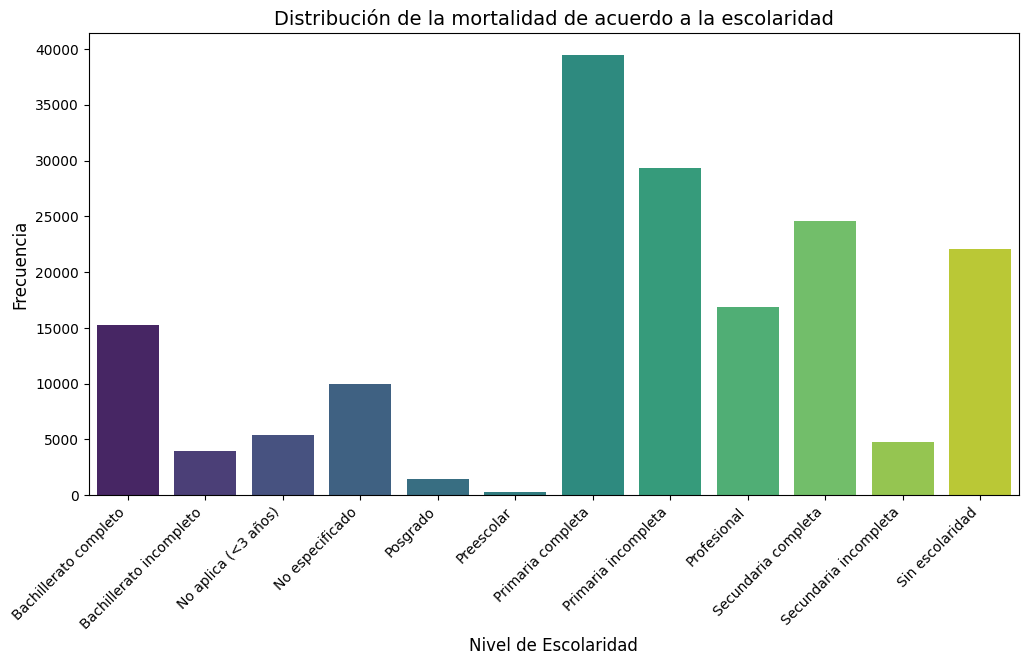

In [12]:
# Diccionario con los valores y etiquetas de escolaridad
escolaridad_dict = {
    1: "Sin escolaridad", 2: "Preescolar", 3: "Primaria incompleta", 4: "Primaria completa",
    5: "Secundaria incompleta", 6: "Secundaria completa", 7: "Bachillerato incompleto",
    8: "Bachillerato completo", 9: "Profesional", 10: "Posgrado",
    88: "No aplica (<3 años)", 99: "No especificado"
}

# Contar la frecuencia de cada nivel de escolaridad en la base de datos "mortalidad"
counts = mortalidad["escolarida"].value_counts().rename(index=escolaridad_dict).sort_index()

# Configuración del gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x=counts.index, y=counts.values, palette="viridis")

# Etiquetas y título
plt.xlabel("Nivel de Escolaridad", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.title("Distribución de la mortalidad de acuerdo a la escolaridad", fontsize=14)
plt.xticks(rotation=45, ha="right")  # Rotar etiquetas para mejor visibilidad

# Mostrar el gráfico
plt.show()


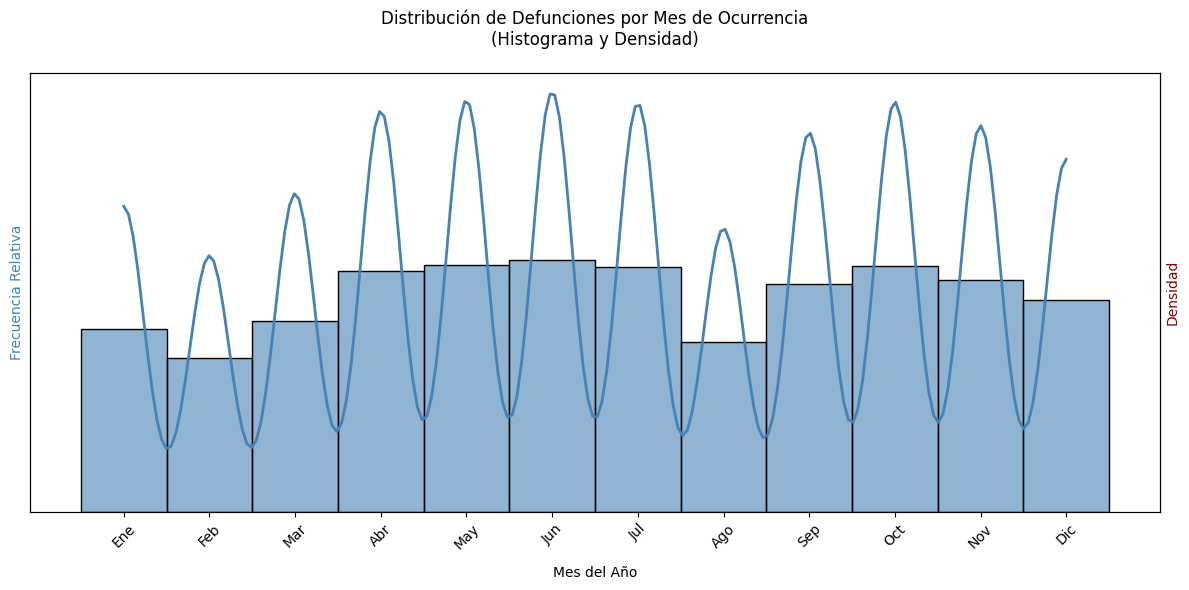

In [13]:
# Filtrar datos (excluir 99 y valores nulos)
datos_filtrados = mortalidad[(mortalidad['mes_ocurr'] >= 1) &
                            (mortalidad['mes_ocurr'] <= 12)]['mes_ocurr'].dropna()

# Configuración del gráfico
plt.figure(figsize=(12, 6))

# Histograma con KDE

ax = sns.histplot(datos_filtrados, bins=12, kde=True, discrete=True,
                 stat='density', alpha=0.6, color='steelblue',
                 kde_kws={'bw_adjust': 0.8},
                 line_kws={'linewidth': 2, 'color': 'darkred'})

# Personalización de ejes
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
         'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
plt.xticks(ticks=range(1, 13), labels=meses, rotation=45)
plt.yticks([])  # Ocultamos ticks del eje Y para densidad

# Doble eje Y para mostrar densidad y conteo
ax2 = ax.twinx()
ax2.set_ylabel('Densidad', color='darkred')
ax2.set_yticks([])  # Ocultamos los números del eje derecho

# Títulos
plt.title('Distribución de Defunciones por Mes de Ocurrencia\n(Histograma y Densidad)', pad=20)
ax.set_xlabel('Mes del Año', labelpad=10)
ax.set_ylabel('Frecuencia Relativa', color='steelblue')

# Líneas de guía
ax.grid(axis='y', alpha=0.3)
ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

# Análisis Bivariado

/tmp/ipython-input-1009678673.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="escolaridad_label", y="edad_transformada", data=mortalidad, palette="coolwarm", showfliers=False, width=0.6)


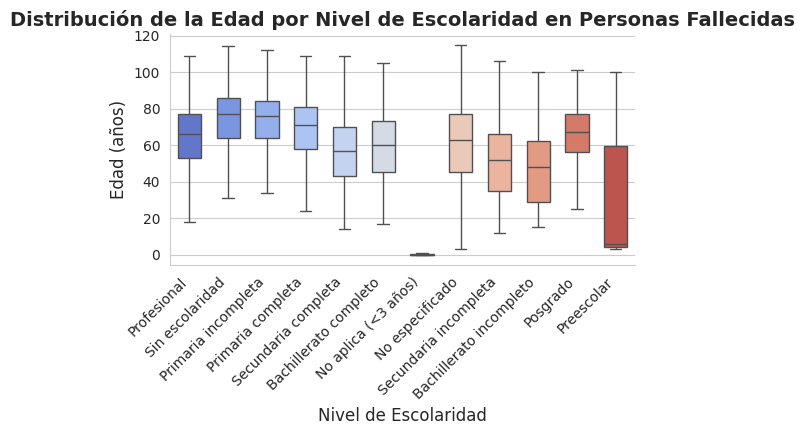

In [14]:
# Aplicar el diccionario para renombrar los valores de escolaridad en la base de datos
mortalidad["escolaridad_label"] = mortalidad["escolarida"].map(escolaridad_dict)

# Configurar el estilo del gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(6, 3))

# Crear el boxplot para mostrar la distribución general de la edad por nivel de escolaridad
sns.boxplot(x="escolaridad_label", y="edad_transformada", data=mortalidad, palette="coolwarm", showfliers=False, width=0.6)


# Ajustar etiquetas y título
plt.title("Distribución de la Edad por Nivel de Escolaridad en Personas Fallecidas", fontsize=14, fontweight="bold")
plt.xlabel("Nivel de Escolaridad", fontsize=12)
plt.ylabel("Edad (años)", fontsize=12)
plt.xticks(rotation=45, ha="right")  # Rotar etiquetas para mayor claridad

# Quitar el borde superior y derecho para un diseño más limpio
sns.despine()

# Mostrar el gráfico
plt.show()


/tmp/ipython-input-3090245854.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="escolaridad_label", y="edad_transformada", data=mortalidad_filtrada, palette="coolwarm", showfliers=False, width=0.6)


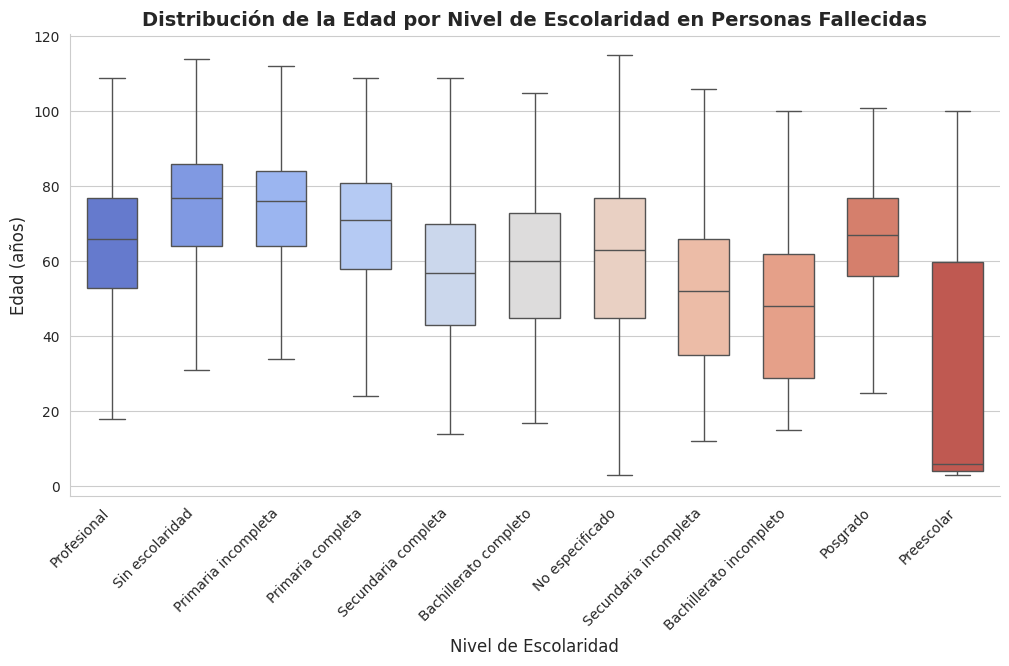

In [15]:
# Crear una copia del DataFrame excluyendo la categoría "No aplica (<3 años)" (valor 88)
mortalidad_filtrada = mortalidad[mortalidad["escolarida"] != 88].copy()

# Aplicar el diccionario para renombrar los valores de escolaridad en la base de datos
mortalidad_filtrada["escolaridad_label"] = mortalidad_filtrada["escolarida"].map(escolaridad_dict)

# Configurar el estilo del gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Crear el boxplot para mostrar la distribución general de la edad por nivel de escolaridad
sns.boxplot(x="escolaridad_label", y="edad_transformada", data=mortalidad_filtrada, palette="coolwarm", showfliers=False, width=0.6)

# Ajustar etiquetas y título
plt.title("Distribución de la Edad por Nivel de Escolaridad en Personas Fallecidas", fontsize=14, fontweight="bold")
plt.xlabel("Nivel de Escolaridad", fontsize=12)
plt.ylabel("Edad (años)", fontsize=12)
plt.xticks(rotation=45, ha="right")  # Rotar etiquetas para mayor claridad

# Quitar el borde superior y derecho para un diseño más limpio
sns.despine()

# Mostrar el gráfico
plt.show()


/tmp/ipython-input-2069920115.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


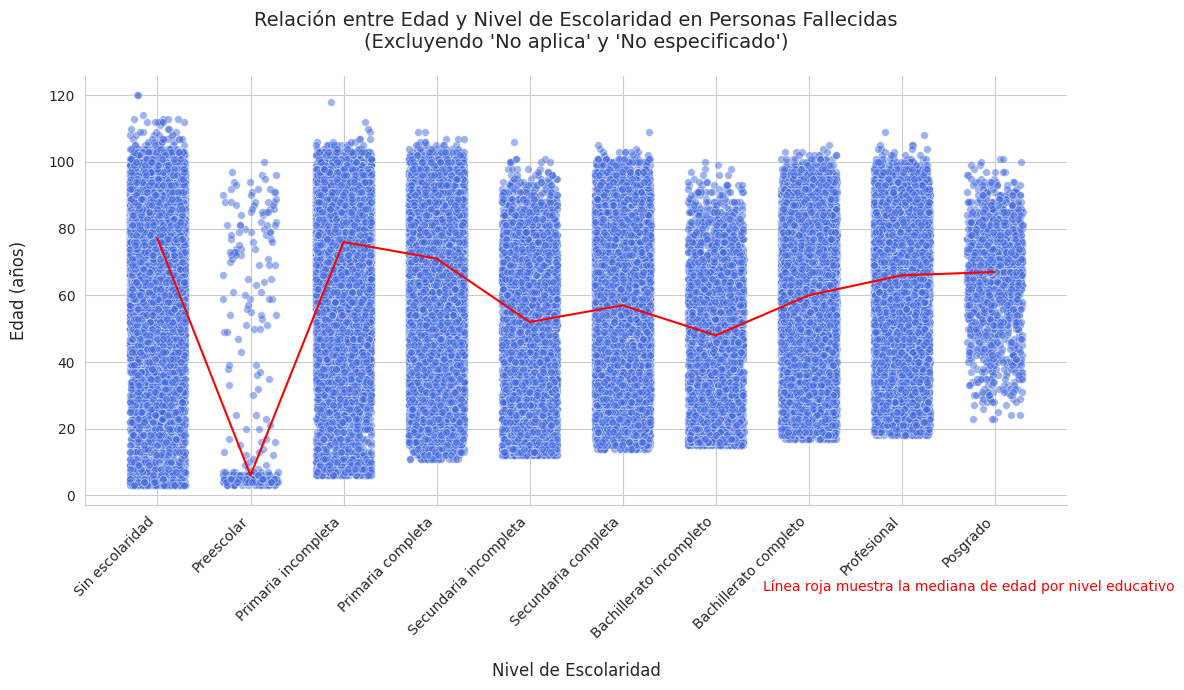

In [16]:
# Filtrar la base de datos para excluir "No aplica (<3 años)" (88) y "No especificado" (99)
mortalidad_filtrada = mortalidad[~mortalidad["escolarida"].isin([88, 99])].copy()

# Aplicar el diccionario de nombres de escolaridad
mortalidad_filtrada["escolaridad_label"] = mortalidad_filtrada["escolarida"].map(escolaridad_dict)

# Agregar jitter en el eje X para separar los puntos
np.random.seed(42)  # Para reproducibilidad
mortalidad_filtrada["escolaridad_label"] = mortalidad_filtrada["escolarida"] + np.random.uniform(-0.3, 0.3, size=len(mortalidad_filtrada))

# Configuración del estilo
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))  # Tamaño aumentado

# Scatter plot con jitter y mejoras visuales
scatter = sns.scatterplot(
    x="escolaridad_label",
    y="edad_transformada",
    data=mortalidad_filtrada,
    color="royalblue",
    alpha=0.5,
    s=30  # Tamaño de puntos
)

# Ajustar etiquetas del eje X
niveles_escolaridad = sorted(mortalidad_filtrada["escolarida"].dropna().unique()) # Remove NaN values
plt.xticks(
    ticks=niveles_escolaridad,
    labels=[escolaridad_dict[int(i)] for i in niveles_escolaridad], # Convert to int for dictionary lookup
    rotation=45,
    ha="right",
    fontsize=10
)

# Mejorar etiquetas y título
plt.title("Relación entre Edad y Nivel de Escolaridad en Personas Fallecidas\n(Excluyendo 'No aplica' y 'No especificado')",
          fontsize=14, pad=20)
plt.xlabel("Nivel de Escolaridad", fontsize=12, labelpad=15)
plt.ylabel("Edad (años)", fontsize=12, labelpad=15)

# Añadir línea de promedio por nivel educativo
sns.lineplot(
    x="escolarida",
    y="edad_transformada",
    data=mortalidad_filtrada,
    color="red",
    ci=None,
    estimator=np.median,
    linewidth=1.5,
    ax=scatter
)

# Añadir anotación explicativa
plt.annotate("Línea roja muestra la mediana de edad por nivel educativo",
             xy=(0.9, -0.2),
             xycoords="axes fraction",
             ha="center",
             fontsize=10,
             color="red")

# Ajustar márgenes y diseño
plt.tight_layout()
sns.despine()

# Mostrar el gráfico
plt.show()

In [17]:
print(mortalidad["sexo"].unique())  # Ver qué valores únicos tiene la columna "sexo"
print(mortalidad[mortalidad["sexo"] == 1].shape)  # Cantidad de filas para hombres
print(mortalidad[mortalidad["sexo"] == 2].shape)  # Cantidad de filas para mujeres


['2' '1' '9']
(0, 74)
(0, 74)


In [18]:
print(mortalidad["lugar_ocur"].isna().sum())  # Ver cuántos NaN hay
print(mortalidad["tipo_defun"].isna().sum())  # Ver cuántos NaN hay


1
1


In [19]:
from scipy.stats import chi2_contingency

# Función para calcular Cramer's V
def cramers_v(x, y):
    tabla_contingencia = pd.crosstab(x, y)  # Tabla de contingencia
    if tabla_contingencia.empty:  # Verificar si hay datos
        return np.nan
    chi2 = chi2_contingency(tabla_contingencia)[0]  # Chi-cuadrado
    n = tabla_contingencia.sum().sum()  # Total de observaciones
    k = min(tabla_contingencia.shape) - 1  # Mínimo entre filas y columnas menos 1
    return np.sqrt(chi2 / (n * k))  # Fórmula de Cramer’s V

# Asegurar que 'sexo' sea numérico
mortalidad["sexo"] = pd.to_numeric(mortalidad["sexo"], errors="coerce")

# Verificar si hay datos en la base
print("Valores únicos en 'sexo':", mortalidad["sexo"].unique())

# Filtrar por sexo y eliminar filas con NaN en 'lugar_ocur' o 'tipo_defun'
df_hombres = mortalidad[(mortalidad["sexo"] == 1) & mortalidad["lugar_ocur"].notna() & mortalidad["tipo_defun"].notna()]
df_mujeres = mortalidad[(mortalidad["sexo"] == 2) & mortalidad["lugar_ocur"].notna() & mortalidad["tipo_defun"].notna()]

# Calcular Cramer's V solo si hay datos suficientes
if not df_hombres.empty:
    cramers_hombres = cramers_v(df_hombres["lugar_ocur"], df_hombres["tipo_defun"])
else:
    cramers_hombres = "No hay datos suficientes"

if not df_mujeres.empty:
    cramers_mujeres = cramers_v(df_mujeres["lugar_ocur"], df_mujeres["tipo_defun"])
else:
    cramers_mujeres = "No hay datos suficientes"

# Imprimir resultados
print(f"Asociación (Cramer’s V) entre lugar de ocurrencia y tipo de defunción en HOMBRES: {cramers_hombres}")
print(f"Asociación (Cramer’s V) entre lugar de ocurrencia y tipo de defunción en MUJERES: {cramers_mujeres}")


Valores únicos en 'sexo': [2 1 9]
Asociación (Cramer’s V) entre lugar de ocurrencia y tipo de defunción en HOMBRES: 0.5014334771006085
Asociación (Cramer’s V) entre lugar de ocurrencia y tipo de defunción en MUJERES: 0.5544287583155181


/tmp/ipython-input-3564145936.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=porcentaje.values, y=porcentaje.index, palette="viridis")


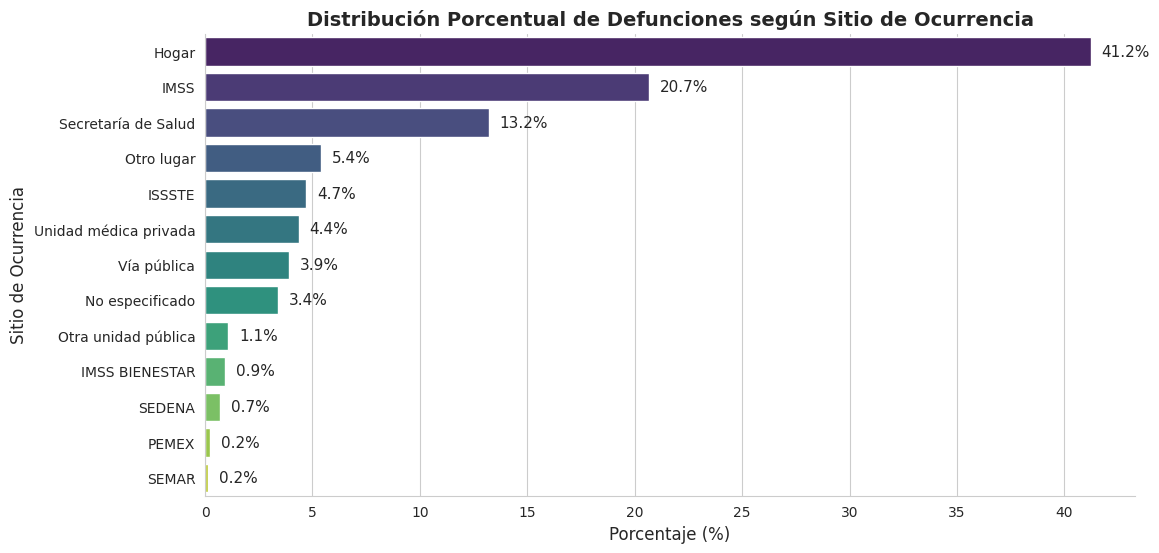

In [20]:
## EJERCICIO PRACTICO
#Distribución Porcentual de Defunciones según Sitio de Ocurrencia
# Diccionario con los valores y etiquetas del sitio de ocurrencia
sitio_ocurrencia_dict = {
    1: "Secretaría de Salud", 2: "IMSS BIENESTAR", 3: "IMSS", 4: "ISSSTE",
    5: "PEMEX", 6: "SEDENA", 7: "SEMAR", 8: "Otra unidad pública",
    9: "Unidad médica privada", 10: "Vía pública", 11: "Hogar",
    12: "Otro lugar", 99: "No especificado"
}

# Reemplazar los valores numéricos por sus etiquetas
mortalidad["Sitio_ocur_label"] = mortalidad["sitio_ocur"].map(sitio_ocurrencia_dict)

# Calcular la distribución porcentual
porcentaje = (mortalidad["Sitio_ocur_label"].value_counts(normalize=True) * 100).sort_values(ascending=False)

# Configurar el estilo del gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Crear el gráfico de barras
sns.barplot(x=porcentaje.values, y=porcentaje.index, palette="viridis")

# Añadir etiquetas
plt.xlabel("Porcentaje (%)", fontsize=12)
plt.ylabel("Sitio de Ocurrencia", fontsize=12)
plt.title("Distribución Porcentual de Defunciones según Sitio de Ocurrencia", fontsize=14, fontweight="bold")

# Mostrar valores en cada barra
for index, value in enumerate(porcentaje.values):
    plt.text(value + 0.5, index, f"{value:.1f}%", va="center", fontsize=11)

# Quitar los bordes superior y derecho para un diseño más limpio
sns.despine()

# Mostrar el gráfico
plt.show()

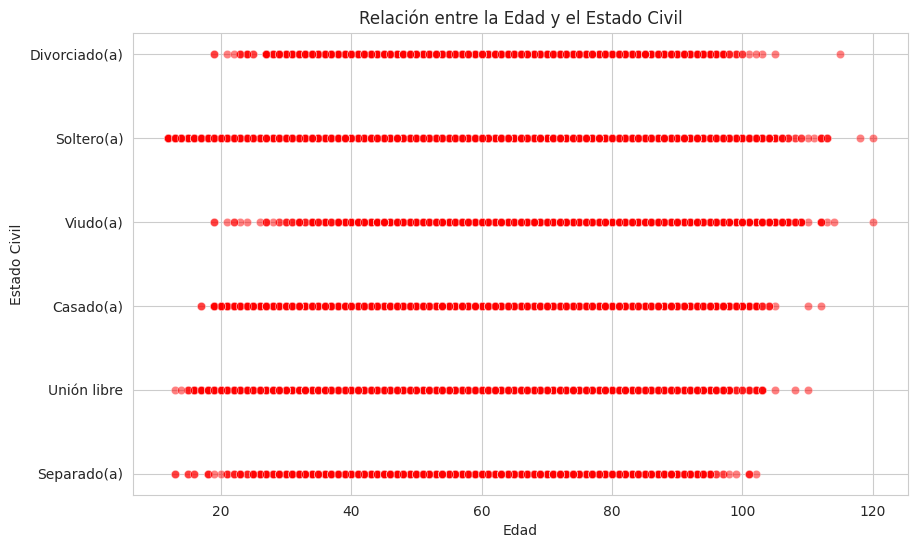

In [21]:
# Análisis bivariado: Edad vs. causa_def
# Diccionario de estado civil
edo_civil_dict = {1: "Soltero(a)", 2: "Divorciado(a)", 3: "Viudo(a)",
    4: "Unión libre", 5: "Casado(a)", 6: "Separado(a)"}

# Filtrar solo los valores 1 a 6 en edo_civil
mortalidad_filtrada = mortalidad[mortalidad["edo_civil"].isin(edo_civil_dict.keys())].copy()

# Reemplazar valores numéricos con etiquetas del diccionario
mortalidad_filtrada["edo_civil_label"] = mortalidad_filtrada["edo_civil"].map(edo_civil_dict)

# Gráfico de dispersión entre edad y estado civil (solo valores 1-6)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='edad_transformada', y='edo_civil_label', data=mortalidad_filtrada, color='red', alpha=0.5)

# Configurar etiquetas y título
plt.title('Relación entre la Edad y el Estado Civil')
plt.xlabel('Edad')
plt.ylabel('Estado Civil')

# Mostrar gráfico
plt.show()

/tmp/ipython-input-3236514588.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="edo_civil_label", y="edad_transformada", data=mortalidad_filtrada, palette="coolwarm", showfliers=False, width=0.6)


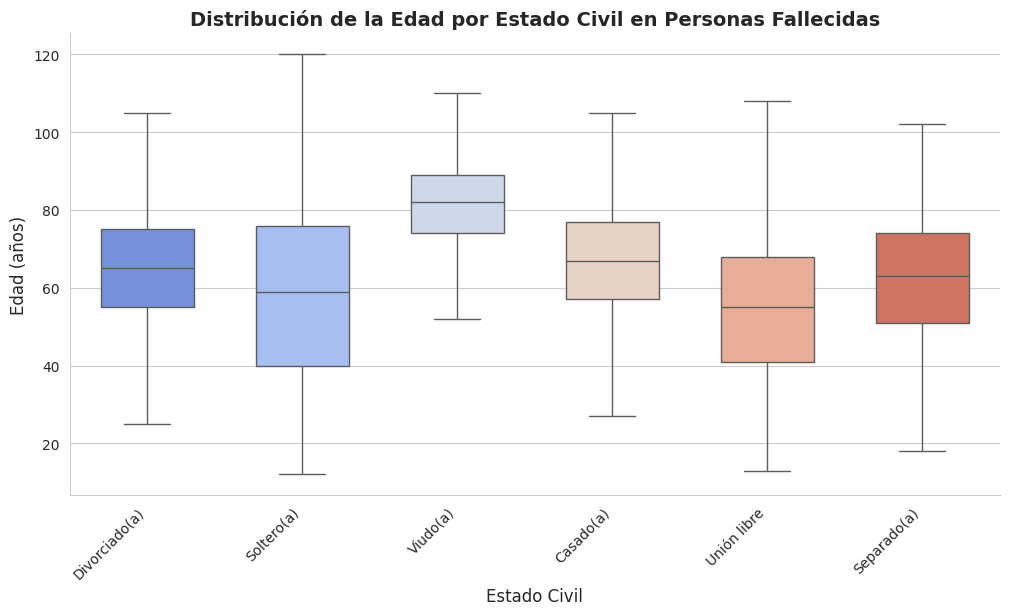

In [22]:

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
# Boxplot para mostrar la distribución general de la edad por estado civil
sns.boxplot(x="edo_civil_label", y="edad_transformada", data=mortalidad_filtrada, palette="coolwarm", showfliers=False, width=0.6)


plt.title("Distribución de la Edad por Estado Civil en Personas Fallecidas", fontsize=14, fontweight="bold")
plt.xlabel("Estado Civil", fontsize=12)
plt.ylabel("Edad (años)", fontsize=12)
plt.xticks(rotation=45, ha="right")
sns.despine()
plt.show()

La correlación entre la edad y el estado civil es de: 0.14


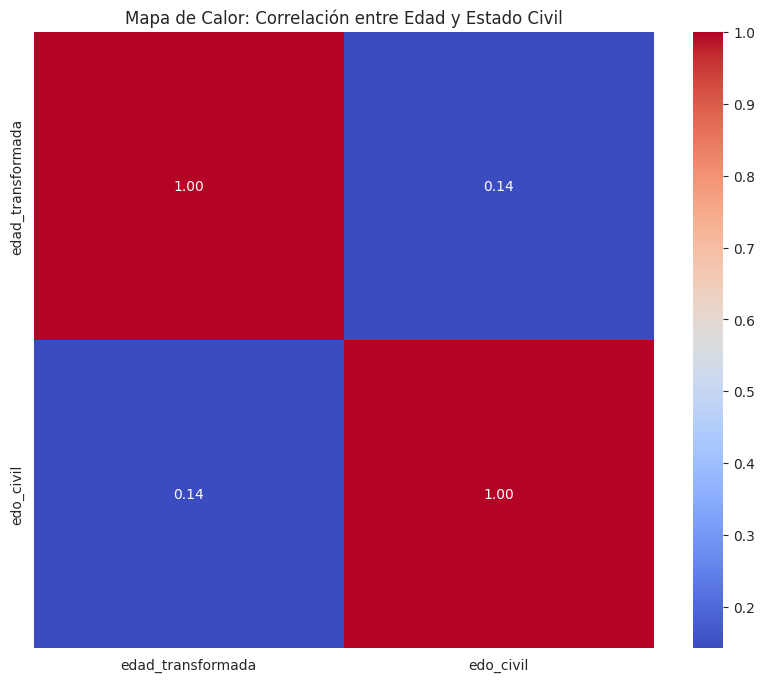

In [23]:
# Calcular la correlación entre edad y estado civil
correlation_value = mortalidad_filtrada['edad_transformada'].corr(mortalidad_filtrada['edo_civil'])
print(f"La correlación entre la edad y el estado civil es de: {correlation_value:.2f}")

# Mapa de calor de la correlación entre edad y estado civil
plt.figure(figsize=(10, 8))
sns.heatmap(mortalidad_filtrada[['edad_transformada', 'edo_civil']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor: Correlación entre Edad y Estado Civil')
plt.show()

El análisis muestra que la relación entre la edad y el estado civil es débil, con una correlación de 0.14. Esto indica que, aunque puede haber cierta tendencia a que el estado civil cambie con la edad, la conexión no es fuerte. En otras palabras, personas con edades similares pueden tener estados civiles muy distintos, lo que sugiere que la edad, por sí sola, no explica significativamente las diferencias en el estado civil.

## Análisis Multivariado

Matriz de Correlación (Cramer's V):
            edo_civil  tipo_defun  lugar_ocur  mun_regis  tloc_regis  \
edo_civil    1.000000    0.124738    0.100043   0.187260    0.091922   
tipo_defun   0.124738    1.000000    0.499233   0.170735    0.091020   
lugar_ocur   0.100043    0.499233    1.000000   0.118491    0.061044   
mun_regis    0.187260    0.170735    0.118491   1.000000    0.697757   
tloc_regis   0.091922    0.091020    0.061044   0.697757    1.000000   
loc_regis    0.054004    0.019892    0.013780   0.226472    0.370824   
ent_resid    0.225584    0.159915    0.110718   0.354650    0.291089   
mun_resid    0.235321    0.149414    0.102889   0.736299    0.503997   
tloc_resid   0.185195    0.141310    0.094611   0.397543    0.502071   
loc_resid    0.175296    0.125961    0.099090   0.201826    0.254030   
ent_ocurr    0.146768    0.131816    0.087837   0.431537    0.296342   

            loc_regis  ent_resid  mun_resid  tloc_resid  loc_resid  ent_ocurr  
edo_civil    0.0540

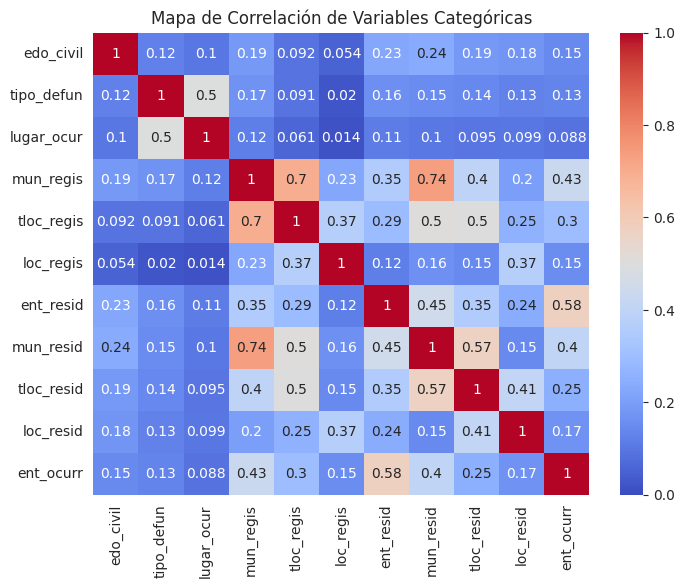

In [24]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Función para calcular el Coeficiente de Correlación de Cramer's V
def cramers_v(x, y):
    # Creamos una tabla de contingencia
    confusion_matrix = pd.crosstab(x, y)

    # Calculamos el estadístico chi-cuadrado
    chi2 = chi2_contingency(confusion_matrix)[0]

    # Calculamos el tamaño total de la muestra
    n = confusion_matrix.sum().sum()

    # Calcular phi2 (correlación basada en chi-cuadrado)
    phi2 = chi2 / n

    # Número de filas y columnas
    r, k = confusion_matrix.shape

    # Ajustar phi2 para Cramer's V
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)

    # Calcular Cramer's V
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Seleccionar las columnas de interés
columnas_interes = ['edo_civil', 'tipo_defun', 'lugar_ocur',"mun_regis",	"tloc_regis",	"loc_regis",	"ent_resid",	"mun_resid"	,"tloc_resid",	"loc_resid",	"ent_ocurr"]
df = mortalidad[columnas_interes]

# Crear una matriz de correlación vacía
corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns)

# Calcular Cramer's V para cada par de variables
for col1 in df.columns:
    for col2 in df.columns:
        corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Convertir la matriz a valores numéricos
corr_matrix = corr_matrix.astype(float)

# Mostrar la matriz de correlación
print("Matriz de Correlación (Cramer's V):")
print(corr_matrix)

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Mapa de Correlación de Variables Categóricas")
plt.show()

El análisis revela una fuerte correlación positiva de0.82 entre la entidad federativa de ocurrencia del evento y la entidad de residencia del individuo. Esto sugiere que, en la mayoría de los casos, los eventos registrados (como defunciones) tienden a suceder en la misma entidad donde residía la persona. Esta relación puede explicarse por la baja movilidad interregional en situaciones de salud crítica o defunción, y por la cercanía entre lugar de residencia y atención médica u hospitalaria.

##  Análisis de Componentes Principales (PCA)
El PCA es útil para reducir la dimensionalidad de los datos, especialmente cuando tienes muchas variables correlacionadas. Esto permitirá visualizar y analizar los datos en un espacio de menor dimensión.

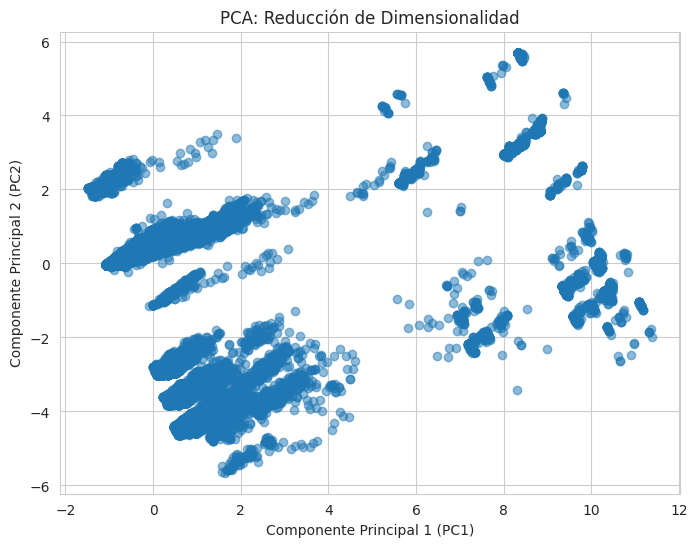

Varianza explicada por cada componente: [0.31310859 0.18200705]


In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Seleccionar las columnas de interés
columnas_interes = ['edo_civil', 'tipo_defun', 'lugar_ocur', 'mun_regis',
                    'loc_regis', 'ent_resid', 'mun_resid', 'loc_resid', 'ent_ocurr']
df = mortalidad[columnas_interes]

# Impute missing values using the mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df_imputed = imputer.fit_transform(df)


# Escalar los datos (PCA requiere datos estandarizados)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed) # Apply scaler to imputed data

# Aplicar PCA
pca = PCA(n_components=2)  # Reducir a 2 componentes principales
pca_result = pca.fit_transform(df_scaled)

# Crear un DataFrame con los resultados de PCA
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Visualizar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)
plt.title("PCA: Reducción de Dimensionalidad")
plt.xlabel("Componente Principal 1 (PC1)")
plt.ylabel("Componente Principal 2 (PC2)")
plt.show()

# Explicación de la varianza
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)

* PCA reduce las variables originales a un número menor de componentes principales (en este caso, 2).

* StandardScaler estandariza los datos para que tengan media 0 y desviación estándar 1, lo cual es necesario para PCA.

* pca.explained_variance_ratio_ te dice cuánta varianza de los datos originales es capturada por cada componente principal.

## Clustering (Agrupamiento)
El clustering es útil para identificar grupos naturales en los datos. Usando algoritmos como K-Means o Agrupamiento Jerárquico.

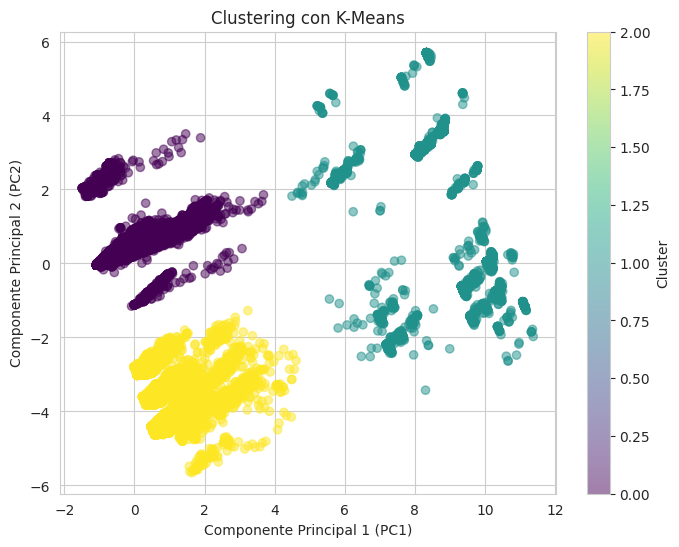

In [26]:
from sklearn.cluster import KMeans

# Aplicar K-Means a los resultados de PCA (o directamente a los datos escalados)
kmeans = KMeans(n_clusters=3, random_state=42)  # Ajusta el número de clusters
df_pca['Cluster'] = kmeans.fit_predict(df_scaled)  # Usar df_scaled para clustering

# Visualizar los clusters en el espacio de PCA
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', alpha=0.5)
plt.title("Clustering con K-Means")
plt.xlabel("Componente Principal 1 (PC1)")
plt.ylabel("Componente Principal 2 (PC2)")
plt.colorbar(label='Cluster')
plt.show()

* K-Means agrupa los datos en un número específico de clusters (en este caso,3).

* Los resultados del clustering se visualizan en el espacio de PCA para interpretar los grupos.

#  Modelo de Regresión Logistica para el Análisis de las Tendencias y Causas de la Mortalidad en México del 2023

* Para usar el Modelo de Regresion Logistica usamos menos variables predictoras
en lugar de dummies para todo, seleccionamos solo algunas variables numéricas o con pocas categorías, por ejemplo:

*  features = edad, escolarida, edo_civil, natviole


Así, reducimos la dimensión del modelo y el número de variables dummy.

Optimization terminated successfully.
         Current function value: 0.664007
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               sexo_bin   No. Observations:               121318
Model:                          Logit   Df Residuals:                   121313
Method:                           MLE   Df Model:                            4
Date:                Thu, 27 Nov 2025   Pseudo R-squ.:                 0.03008
Time:                        16:29:42   Log-Likelihood:                -80556.
converged:                       True   LL-Null:                       -83055.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0140      0.029    -34.578      0.000      -1.071      -0.957
edad_agru      0.0285      0.

/tmp/ipython-input-2757426111.py:82: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=coef_df, x='Coef', y='Variable', join=False, color='orange')


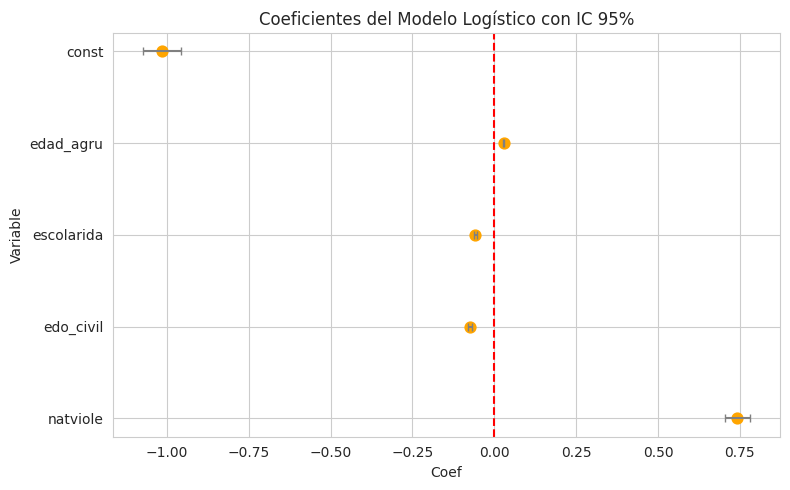

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chi2, norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Filtrar sexo válido
mortalidad = mortalidad[mortalidad['sexo'].isin([1, 2])].copy()
mortalidad['sexo_bin'] = mortalidad['sexo'].map({1: 0, 2: 1})  # 0 = Hombre, 1 = Mujer

# Variables predictoras (usando edad_agru en lugar de edad)
features = ['edad_agru', 'escolarida', 'edo_civil', 'natviole']

# Eliminar NA
mortalidad_model = mortalidad.dropna(subset=features + ['sexo_bin']).copy()

# Codificar variables categóricas como numéricas
for col in ['escolarida', 'edo_civil', 'natviole']:
    mortalidad_model[col] = mortalidad_model[col].astype('category').cat.codes

# Dividir datos en entrenamiento y prueba
X = mortalidad_model[features]
y = mortalidad_model['sexo_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Añadir constante
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Modelo logístico
modelo = sm.Logit(y_train, X_train_sm).fit()
print(modelo.summary())

# Predicción y evaluación
y_pred_prob = modelo.predict(X_test_sm)
y_pred = (y_pred_prob >= 0.5).astype(int)

print("\nEvaluación del modelo:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))

# Estadísticas de Wald
wald_stat = modelo.params / np.sqrt(np.diag(modelo.cov_params()))
wald_pvalues = 2 * (1 - norm.cdf(np.abs(wald_stat)))
wald_df = pd.DataFrame({
    "Coef": modelo.params,
    "Wald Statistic": wald_stat,
    "p-value": wald_pvalues
}).round(4)
print("\nEstadísticas de Wald:")
print(wald_df)

# Comparación con modelo reducido (sin natviole)
X_train_red = X_train.drop(columns=["natviole"])
X_train_red_sm = sm.add_constant(X_train_red)
modelo_reducido = sm.Logit(y_train, X_train_red_sm).fit(disp=0)

# LRT
stat_lrt = 2 * (modelo.llf - modelo_reducido.llf)
df_diff = modelo_reducido.df_resid - modelo.df_resid
p_value_lrt = chi2.sf(stat_lrt, df_diff)
print("\nPrueba LRT (modelo completo vs reducido):")
print(pd.DataFrame({
    "Stat LRT": [stat_lrt],
    "df_diff": [df_diff],
    "p-value": [p_value_lrt]
}).round(4))

# Visualización de coeficientes con IC 95%
conf = modelo.conf_int()
conf.columns = ['2.5%', '97.5%']
coef_df = pd.concat([modelo.params, conf], axis=1).reset_index()
coef_df.columns = ['Variable', 'Coef', '2.5%', '97.5%']

plt.figure(figsize=(8, 5))
sns.pointplot(data=coef_df, x='Coef', y='Variable', join=False, color='orange')
plt.errorbar(coef_df['Coef'], coef_df['Variable'],
             xerr=[coef_df['Coef'] - coef_df['2.5%'], coef_df['97.5%'] - coef_df['Coef']],
             fmt='none', ecolor='gray', capsize=3)
plt.axvline(0, color='red', linestyle='--')
plt.title('Coeficientes del Modelo Logístico con IC 95%')
plt.grid(True)
plt.tight_layout()
plt.show()

Optimization terminated successfully.
         Current function value: 0.676683
         Iterations 5


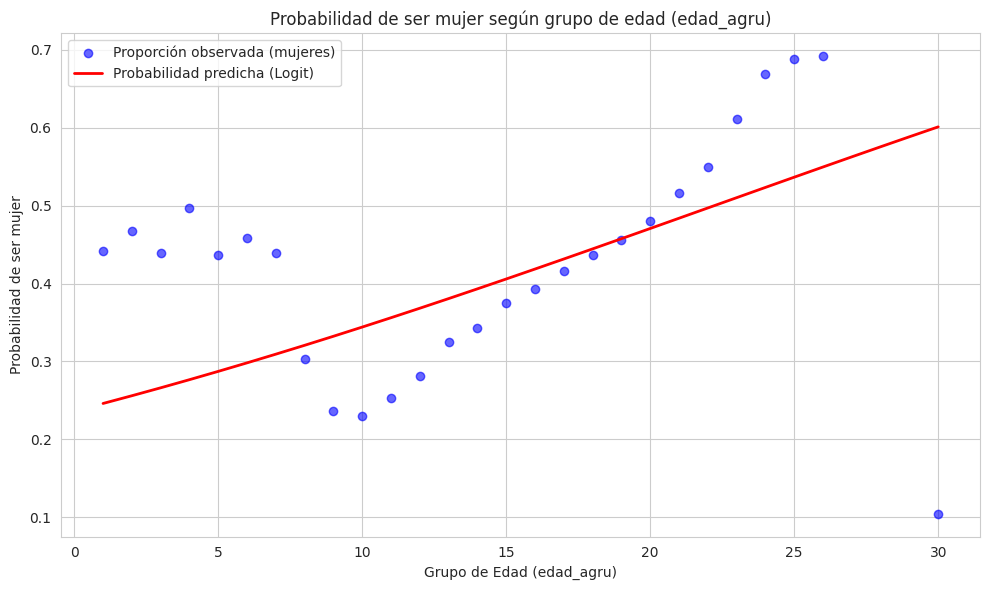

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               sexo_bin   No. Observations:               173289
Model:                          Logit   Df Residuals:                   173287
Method:                           MLE   Df Model:                            1
Date:                Thu, 27 Nov 2025   Pseudo R-squ.:                 0.01171
Time:                        16:41:28   Log-Likelihood:            -1.1726e+05
converged:                       True   LL-Null:                   -1.1865e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1722      0.018    -63.387      0.000      -1.208      -1.136
edad_agru      0.0527      0.001     51.466      0.000       0.051       0.055
==============================================================================
"""

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Filtrar sexo válido y codificar como variable binaria
mortalidad = mortalidad[mortalidad["sexo"].isin([1, 2])].copy()
mortalidad["sexo_bin"] = mortalidad["sexo"].map({1: 0, 2: 1})  # 0 = Hombre, 1 = Mujer

# Agrupar por edad_agru: proporción observada de mujeres
grupo = mortalidad.groupby("edad_agru")["sexo_bin"]
observado = grupo.mean()
conteo = grupo.count()

# Filtrar grupos de edad con suficientes observaciones (> 30 casos)
grupos_validos = conteo[conteo > 30].index
mortalidad_filtrada = mortalidad[mortalidad["edad_agru"].isin(grupos_validos)].copy()

# Ajustar modelo logístico con edad_agru
X = sm.add_constant(mortalidad_filtrada["edad_agru"])
y = mortalidad_filtrada["sexo_bin"]
modelo_logit = sm.Logit(y, X).fit()

# Rango de grupos de edad para predecir
edad_agru_rango = np.arange(mortalidad_filtrada["edad_agru"].min(),
                            mortalidad_filtrada["edad_agru"].max() + 1)
X_pred = sm.add_constant(edad_agru_rango)
pred_proba = modelo_logit.predict(X_pred)

# Graficar: observaciones vs predicciones
plt.figure(figsize=(10, 6))
plt.scatter(observado.loc[grupos_validos].index, observado.loc[grupos_validos].values,
            color='blue', alpha=0.6, label='Proporción observada (mujeres)')
plt.plot(edad_agru_rango, pred_proba, color='red', linewidth=2, label='Probabilidad predicha (Logit)')
plt.xlabel("Grupo de Edad (edad_agru)")
plt.ylabel("Probabilidad de ser mujer")
plt.title("Probabilidad de ser mujer según grupo de edad (edad_agru)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Mostrar resumen del modelo
modelo_logit.summary()


#  Modelo de Regresión Polinomica para el Análisis de las Tendencias y Causas de la Mortalidad en México del 2023

### ¿Por qué usamos diferentes grados en la regresión polinómica?

La regresión polinómica nos permite modelar relaciones no lineales entre la edad y el número de defunciones. El **grado del polinomio** define la flexibilidad del modelo:

| Grado del polinomio | Qué captura | Riesgo |
|--------------------|-------------|--------|
| **Grado 2 (cuadrático)** | Patrón en forma de U o arco (una sola curvatura) | Puede ser demasiado simple y no seguir bien los datos si el patrón es más complejo. |
| **Grado 3 (cúbico)** | Permite hasta dos puntos de inflexión (cambio de curvatura) | Ajusta mejor, pero podría empezar a seguir el ruido. |
| **Grado 4 (cuártico)** | Permite formas más onduladas y complejas | Mayor riesgo de sobreajuste: el modelo se adapta demasiado a las fluctuaciones y pierde capacidad de generalización. |

**¿Por qué probar varios grados?**

- Para encontrar un equilibrio entre simplicidad y buen ajuste a los datos.
- Porque la mortalidad suele tener un patrón complejo: alta en edades muy tempranas y avanzadas, y baja en edades intermedias.
- Para evaluar el modelo con métricas como R² y validación cruzada, y no solo por la apariencia del gráfico.

Probar distintos grados nos ayuda a elegir el modelo que mejor describe la realidad sin sobreajustarse.


--- Polinomio grado 2 ---
R²: 0.701
MSE: 401025.571
MSE validación cruzada: 5748075.051
Shapiro-Wilk residuos: stat=0.935, p-valor=0.000


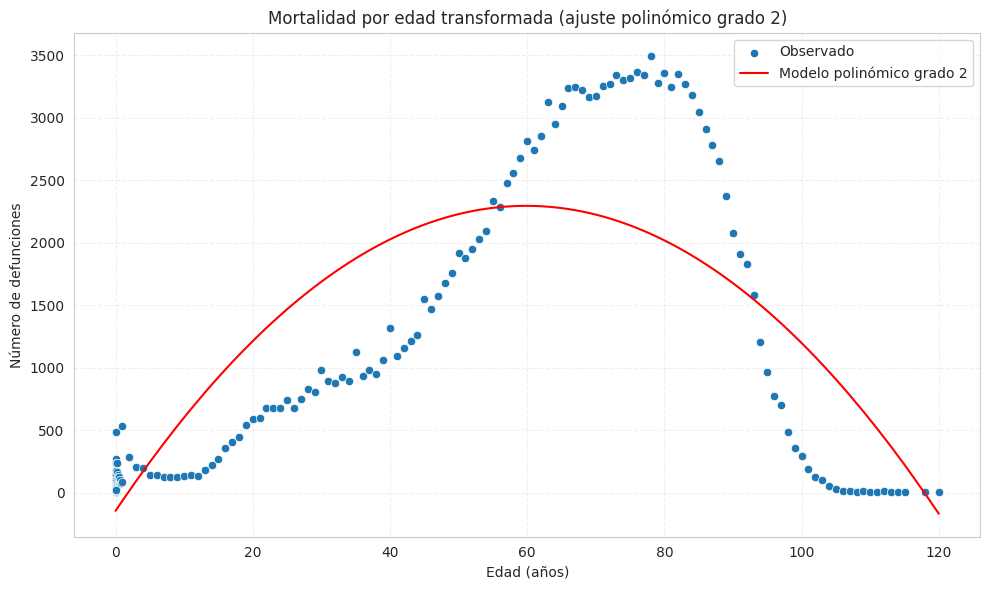


--- Polinomio grado 3 ---
R²: 0.863
MSE: 184136.809
MSE validación cruzada: 2131312.421
Shapiro-Wilk residuos: stat=0.903, p-valor=0.000


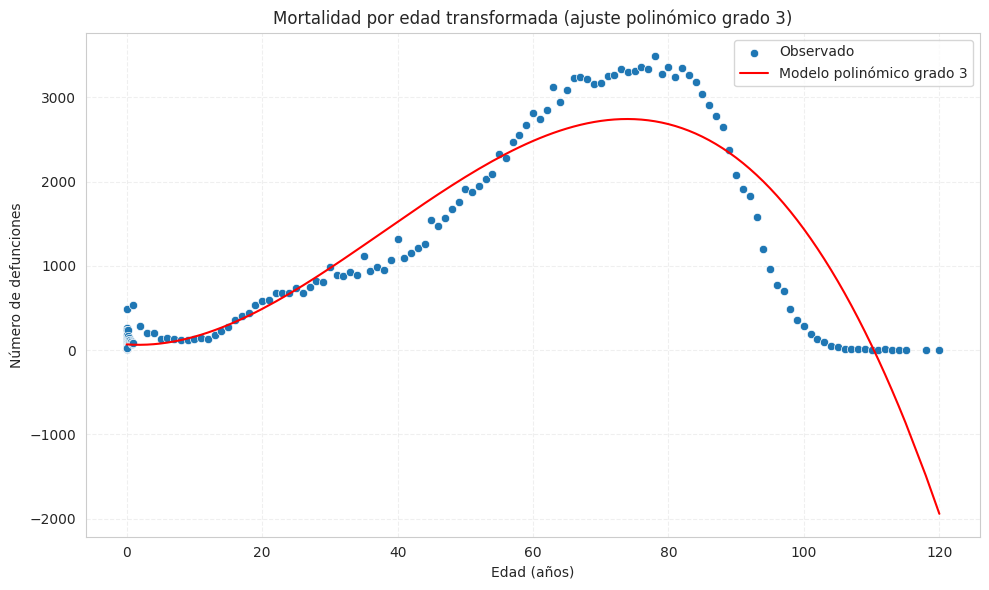


--- Polinomio grado 4 ---
R²: 0.894
MSE: 142580.729
MSE validación cruzada: 3287250.449
Shapiro-Wilk residuos: stat=0.978, p-valor=0.007


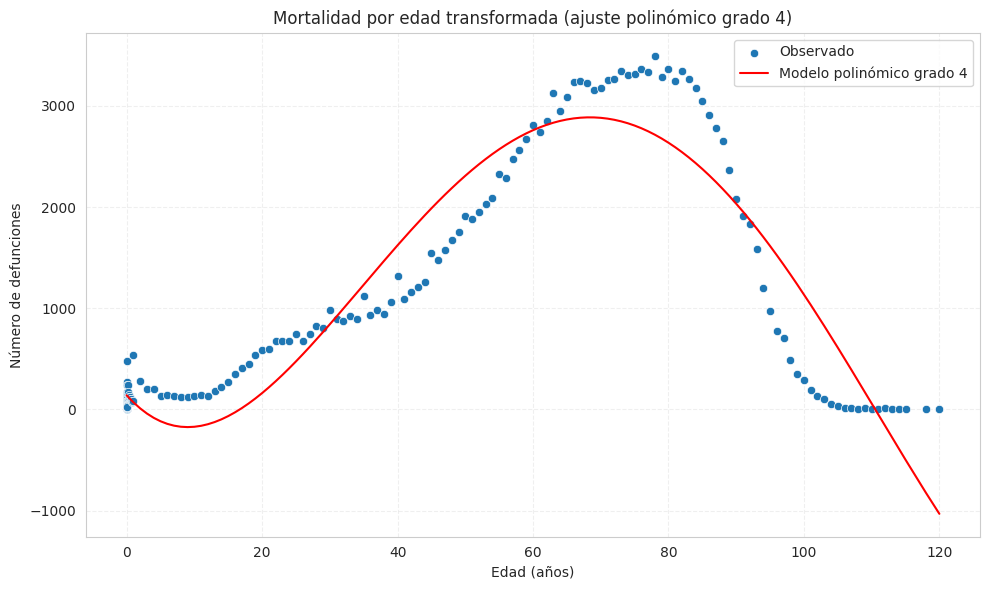

In [33]:
##########  USANDO EDAD EN AÑOS   ################
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from scipy.stats import shapiro

def convertir_a_anios(valor):
    if 1001 <= valor <= 1023:  # Horas
        return (valor - 1000) / 8760
    elif 2001 <= valor <= 2029:  # Días
        return (valor - 2000) / 365
    elif 3001 <= valor <= 3011:  # Meses
        return (valor - 3000) / 12
    elif 4001 <= valor <= 4120:  # Años
        return valor - 4000
    else:
        return np.nan

mortalidad['edad_transformada'] = mortalidad['edad'].apply(convertir_a_anios)

# Eliminamos registros sin edad válida
mortalidad_valid = mortalidad[(~mortalidad['edad_transformada'].isna()) & (mortalidad['anio_ocur'] == 2023)]

# Agrupamos los datos
df_simple = (
    mortalidad_valid
    .groupby('edad_transformada')
    .size()
    .reset_index(name='defunciones')
    .sort_values('edad_transformada')
)

def ajustar_y_graficar(df, grado):
    X = df[['edad_transformada']]
    y = df['defunciones']

    poly = PolynomialFeatures(degree=grado)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    y_pred = model.predict(X_poly)

    # Validación
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    mse_cv = -cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_squared_error').mean()
    residuos = y - y_pred
    stat, p_shapiro = shapiro(residuos)

    # Métricas
    print(f"\n--- Polinomio grado {grado} ---")
    print(f"R²: {r2:.3f}")
    print(f"MSE: {mse:.3f}")
    print(f"MSE validación cruzada: {mse_cv:.3f}")
    print(f"Shapiro-Wilk residuos: stat={stat:.3f}, p-valor={p_shapiro:.3f}")


    plt.figure(figsize=(10,6))
    sns.scatterplot(x='edad_transformada', y='defunciones', data=df, label='Observado')
    sns.lineplot(x=df['edad_transformada'], y=y_pred, color='red', label=f'Modelo polinómico grado {grado}')
    plt.title(f'Mortalidad por edad transformada (ajuste polinómico grado {grado})')
    plt.xlabel('Edad (años)')
    plt.ylabel('Número de defunciones')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

# MODELOS
for grado in [2, 3, 4]:
    ajustar_y_graficar(df_simple, grado)


--- Polinomio grado 2 ---
R²: 0.495
MSE: 17540599.795
MSE validación cruzada: 103942673.230
Shapiro-Wilk residuos: stat=0.886, p-valor=0.004


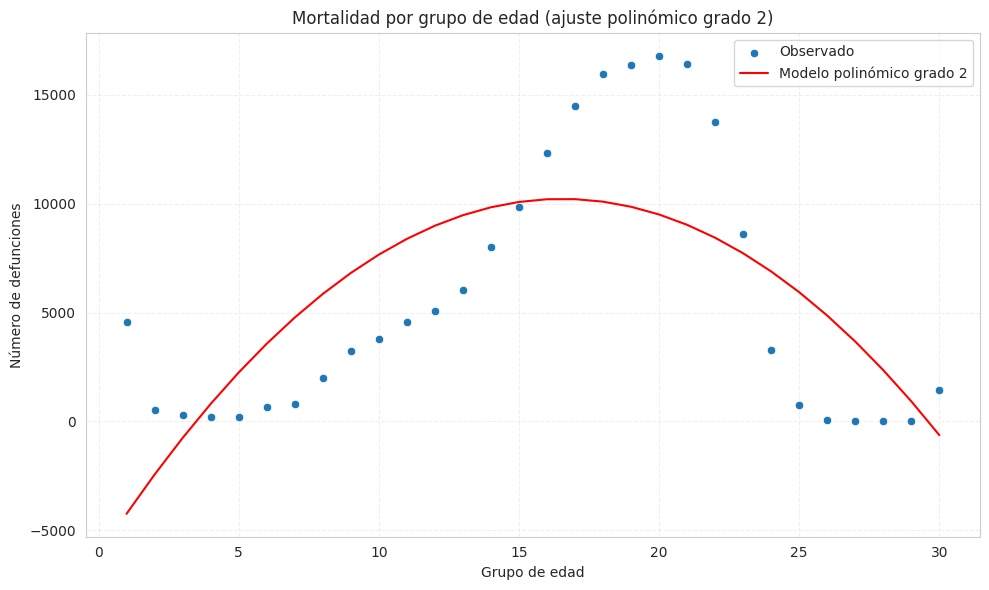


--- Polinomio grado 3 ---
R²: 0.679
MSE: 11160240.368
MSE validación cruzada: 142243118.050
Shapiro-Wilk residuos: stat=0.951, p-valor=0.180


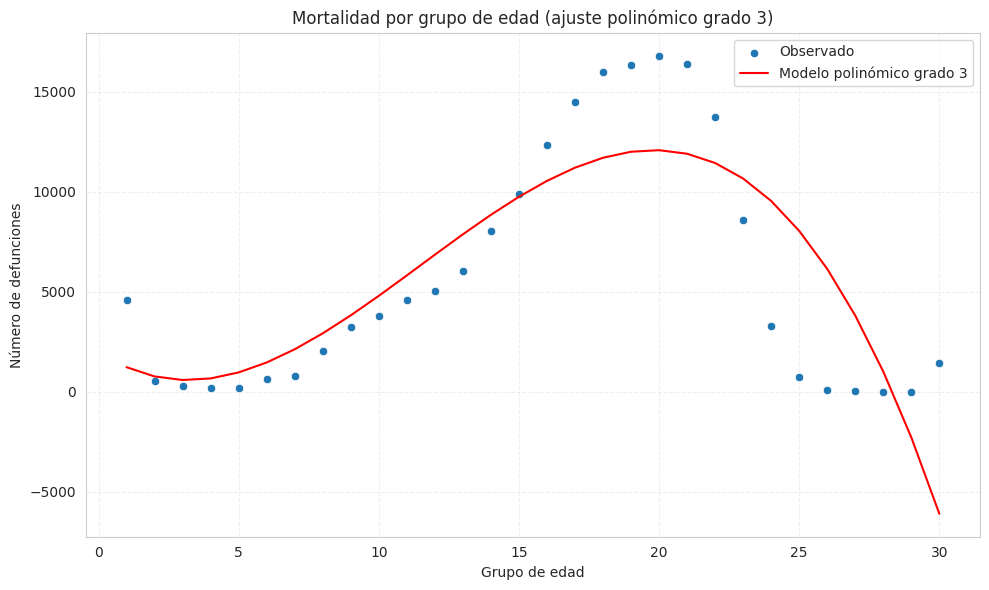


--- Polinomio grado 4 ---
R²: 0.821
MSE: 6215031.837
MSE validación cruzada: 844798210.904
Shapiro-Wilk residuos: stat=0.974, p-valor=0.648


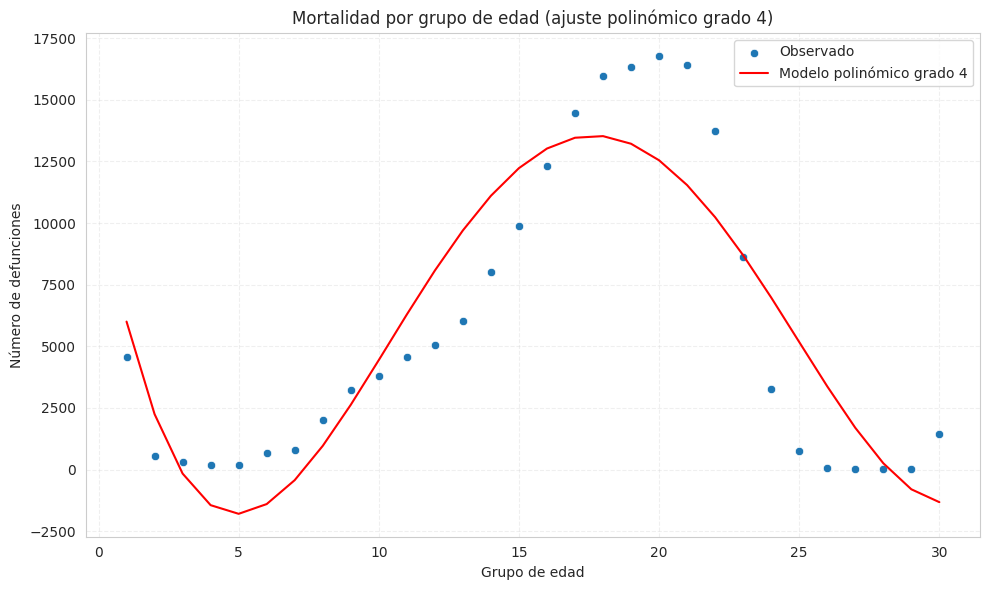

In [34]:
#######  USANDO EDAD_AGRU (opcional)   ################


# Contar defunciones totales por grupo de edad
df_simple = (
    mortalidad[mortalidad['anio_ocur'] == 2023]
    .groupby('edad_agru')
    .size()
    .reset_index(name='defunciones')
    .sort_values('edad_agru')
)

def ajustar_y_graficar(df, grado):
    X = df[['edad_agru']]
    y = df['defunciones']

    poly = PolynomialFeatures(degree=grado)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    y_pred = model.predict(X_poly)

    # Validación
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    mse_cv = -cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_squared_error').mean()
    residuos = y - y_pred
    stat, p_shapiro = shapiro(residuos)

    # Métricas
    print(f"\n--- Polinomio grado {grado} ---")
    print(f"R²: {r2:.3f}")
    print(f"MSE: {mse:.3f}")
    print(f"MSE validación cruzada: {mse_cv:.3f}")
    print(f"Shapiro-Wilk residuos: stat={stat:.3f}, p-valor={p_shapiro:.3f}")

    # Graficar
    plt.figure(figsize=(10,6))
    sns.scatterplot(x='edad_agru', y='defunciones', data=df, label='Observado')
    sns.lineplot(x=df['edad_agru'], y=y_pred, color='red', label=f'Modelo polinómico grado {grado}')
    plt.title(f'Mortalidad por grupo de edad (ajuste polinómico grado {grado})')
    plt.xlabel('Grupo de edad')
    plt.ylabel('Número de defunciones')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

#  MODELOS
for grado in [2, 3, 4]:
    ajustar_y_graficar(df_simple, grado)

# Simulación Monte Carlo

Edad media real: 64.52430726437794
Edad media simulada Monte Carlo: 64.27264748858448
Probabilidad simulada de morir antes de 60: 0.3374


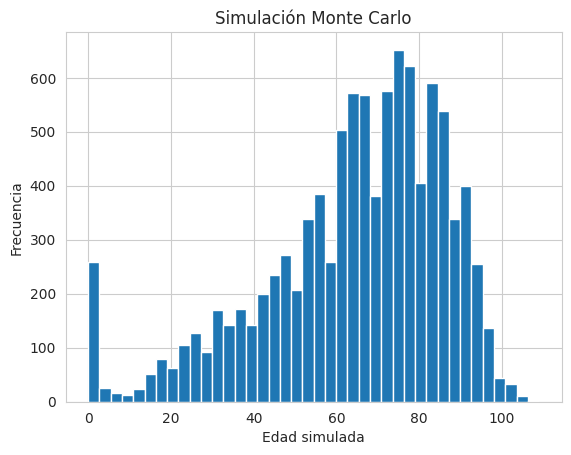

In [49]:
# Función para convertir los valores de edad a años
def convertir_a_anios(valor):
    if 1001 <= valor <= 1023:  # Horas
        return (valor - 1000) / 8760  # Convertir horas a años
    elif 2001 <= valor <= 2029:  # Días
        return (valor - 2000) / 365  # Convertir días a años
    elif 3001 <= valor <= 3011:  # Meses
        return (valor - 3000) / 12  # Convertir meses a años
    elif 4001 <= valor <= 4120:  # Años
        return valor - 4000  # Ya está en años
    else:
        return np.nan  # Si no está en los rangos, se asigna NaN

# Aplicar la conversión a la columna "edad"
mortalidad['edad_transformada'] = mortalidad['edad'].apply(convertir_a_anios)

# Usamos edades
edades = mortalidad['edad_transformada'].dropna()

# Número de simulaciones
N = 10000

# Simulación Monte Carlo usando edades
sim_MC = np.random.choice(edades, size=N, replace=True)

print("Edad media real:", edades.mean())
print("Edad media simulada Monte Carlo:", sim_MC.mean())

# Probabilidad de morir antes de 60 años (simulada)
prob_menor_60 = np.mean(sim_MC < 60)
print("Probabilidad simulada de morir antes de 60:", prob_menor_60)

plt.hist(sim_MC, bins=40)
plt.title("Simulación Monte Carlo")
plt.xlabel("Edad simulada")
plt.ylabel("Frecuencia")
plt.show()



Media bootstrap: 64.52667051200817
IC 95% bootstrap: (np.float64(64.47907009082348), np.float64(64.57259893219288))


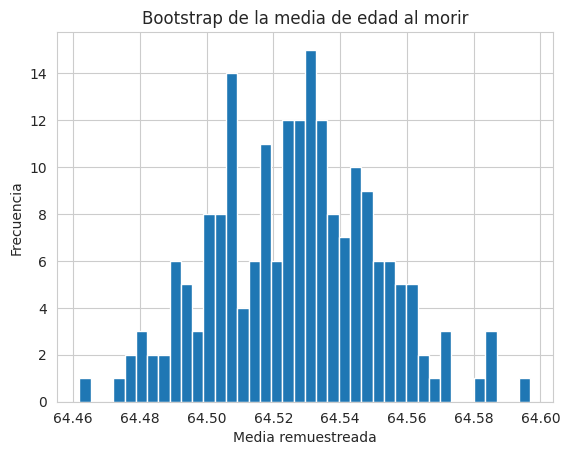

In [48]:
B = 200  # número de remuestreos bootstrap
boot_means = []

for i in range(B):
    muestra = edades.sample(frac=1, replace=True)
    boot_means.append(muestra.mean())

# Intervalo de confianza del 95%
IC_low = np.percentile(boot_means, 2.5)
IC_high = np.percentile(boot_means, 97.5)

print("Media bootstrap:", np.mean(boot_means))
print("IC 95% bootstrap:", (IC_low, IC_high))

plt.hist(boot_means, bins=40)
plt.title("Bootstrap de la media de edad al morir")
plt.xlabel("Media remuestreada")
plt.ylabel("Frecuencia")
plt.show()

In [45]:
mortalidad['grupo_edad'] = pd.cut(
    mortalidad['edad_transformada'],
    bins=[0,20,40,60,80,120],
    labels=['0-20','21-40','41-60','61-80','81+']
)

In [46]:
conteo_anual = mortalidad.groupby(['anio_ocur','grupo_edad']).size().unstack(fill_value=0)
conteo_anual


/tmp/ipython-input-1605073311.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo_anual = mortalidad.groupby(['anio_ocur','grupo_edad']).size().unstack(fill_value=0)


grupo_edad,0-20,21-40,41-60,61-80,81+
anio_ocur,,,,,
1900,0,0,0,0,0
1961,0,1,0,0,0
1963,0,1,2,1,0
1964,1,1,1,0,0
1965,1,0,0,0,0
...,...,...,...,...,...
2020,12,91,142,240,200
2021,33,127,184,359,274
2022,328,1351,2940,6258,5317


In [47]:
years = sorted(mortalidad['anio_ocur'].unique())
P = np.zeros((5,5))  # matriz 5x5 por 5 grupos de edad

for t in range(len(years)-1):
    A = conteo_anual.loc[years[t]].values        # distribución en año t
    B = conteo_anual.loc[years[t+1]].values      # distribución en año t+1

    # Evitar divisiones por cero
    if A.sum() == 0 or B.sum() == 0:
        continue

    # Matriz de transición para ese par de años
    T = np.outer(A/A.sum(), B/B.sum())
    P += T

# Promedio de transiciones por año
P = P / (len(years)-1)

print("Matriz de transición de Markov basada en tus datos reales:")
print(P)


Matriz de transición de Markov basada en tus datos reales:
[[0.01138255 0.01456609 0.01147106 0.02498508 0.00239241]
 [0.0133771  0.03486188 0.04238689 0.05722403 0.01607845]
 [0.01539634 0.02885083 0.06440095 0.09894564 0.02906884]
 [0.0228265  0.05355488 0.09114978 0.11323222 0.06477533]
 [0.0028435  0.02304118 0.03219219 0.05382664 0.02716962]]


# 📊 Reporte Final: Análisis de Regresión Logística sobre Sexo Binario

## 1. Objetivo del modelo
Este modelo logístico tiene como objetivo predecir la probabilidad de que una persona registrada en la base de datos sea **mujer** (`sexo_bin = 1`), en función de variables sociodemográficas como:

- Edad
- Escolaridad
- Estado civil
- Causa violenta de la muerte (`natviole`)

---

## 2. Variables consideradas

| Variable     | Descripción                                       |
|--------------|---------------------------------------------------|
| `edad`       | Edad en años                                      |
| `escolarida` | Nivel de escolaridad (codificado como numérico)  |
| `edo_civil`  | Estado civil (codificado como numérico)          |
| `natviole`   | Muerte por causa violenta (1 = sí, 0 = no)        |

---

## 3. Resultados del modelo logístico

### Coeficientes y significancia

| Variable     | Coeficiente | z-value  | p-valor | Intervalo 95%       | Interpretación                                             |
|--------------|-------------|----------|---------|---------------------|------------------------------------------------------------|
| Intercepto   | 0.8226      | 20.57    | 0.000   | [0.744, 0.901]      | Punto base del modelo                                      |
| Edad         | -0.0003     | -33.09   | 0.000   | [-0.0003, -0.0003]  | A mayor edad, menor probabilidad de ser mujer              |
| Escolaridad  | -0.0806     | -82.33   | 0.000   | [-0.083, -0.079]    | Mayor escolaridad se asocia con hombres                    |
| Edo. Civil   | -0.0898     | -62.37   | 0.000   | [-0.093, -0.087]    | Algunos estados civiles predominan en hombres              |
| Natviole     | 0.7641      | 96.47    | 0.000   | [0.749, 0.780]      | Las muertes violentas están asociadas con hombres          |

> Todos los coeficientes son **estadísticamente significativos** (p < 0.001).

---

## 4. Métricas de ajuste del modelo

- **Pseudo R² (McFadden):** `0.0286`
- **Log-Likelihood (modelo):** `-372,900`
- **Log-Likelihood (modelo nulo):** `-383,880`
- **LLR p-valor (Likelihood Ratio Test):** `< 0.001`
- **Estadística LRT (modelo completo vs reducido):** `9959.0375`
- **Significancia del cambio:** `p < 0.001` → `natviole` mejora significativamente el modelo.

---

## 5. Evaluación del modelo (Conjunto de prueba)

- **Accuracy:** `0.5795`  
- **ROC-AUC:** `0.6190` → Discriminación moderadamente baja, pero útil.

### Matriz de Confusión:

|                   | Predicho: Hombre (0) | Predicho: Mujer (1) |
|-------------------|----------------------|----------------------|
| Observado Hombre (0) | 108,661              | 24,975               |
| Observado Mujer (1)  | 75,854               | 30,319               |


### Informe de Clasificación:

| Clase | Precision | Recall | F1-score | Soporte |
|-------|-----------|--------|----------|---------|
| 0 (Hombres) | 0.59 | 0.81 | 0.68 | 133636 |
| 1 (Mujeres) | 0.55 | 0.29 | 0.38 | 106173 |

- El modelo predice con mayor éxito los casos de hombres.
- La clase femenina tiene una menor tasa de recuperación (recall).

---

## 6. Conclusiones

- Variables como **edad**, **escolaridad**, y **estado civil** están asociadas negativamente con la probabilidad de que la persona sea mujer.
- La variable **natviole** tiene una **asociación positiva fuerte**, indicando que las muertes por violencia son mucho más frecuentes en hombres.
- El modelo es significativo y útil desde el punto de vista explicativo, aunque su capacidad predictiva (ROC-AUC ≈ 0.62) es **moderada**.
